In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")
from sklearn.tree import DecisionTreeClassifier
import pickle

In [10]:
data = "occupancy"
method = "classic_mondrian"
k_list = [5, 100, 250, 500, 750, 1000, 2000]

In [11]:
class Mondrian_Utility:
    def __init__(self, data, method, k_list):
        self.data = data
        self.method = method
        self.k_list = k_list
    
    def anonymize(self):
        for k in self.k_list:
            os.system(f'python privacy/anonymize.py --method={self.method} --k={k} --dataset={self.data}')
    
    def get_features(self):
        self.features = []
        for k in self.k_list:
            pr_data, X_org, y_org, pr_data_anon, X_anon, y_anon = encodeData(self.data, self.method, k)
            if not len(self.features):
                self.features.append((X_org, y_org))
                pr_data.to_csv(f"./pr_mondrian_results/{self.data}_anonymized_org.csv", index=False)
            self.features.append((X_anon, y_anon))
            pr_data_anon.to_csv(f"./pr_mondrian_results/{self.data}_anonymized_{k}.csv", index=False)

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            model = DecisionTreeClassifier(max_depth=5)
            self.models.append(model)

    def prepare_training(self):
        self.anonymize()
        self.get_features()
        self.get_model()
    
    def train(self):
        for i in range(len(self.k_list) + 1):
            X, y = self.features[i]
            self.models[i].fit(X, y)
            if i == 0:
                pickle.dump(self.models[i], open("./weights/tree_org.sav", 'wb'))
            else:
                pickle.dump(self.models[i], open(f"./weights/tree_{k_list[i-1]}.sav", 'wb'))
            print(f"{i+1} trained.")

    
    def test(self):
        test_accs = []
        for i in range(len(self.k_list) + 1):
            if i == 0:
                self.models[i] = pickle.load(open("./weights/tree_org.sav", 'rb'))
            else:
                self.models[i] = pickle.load(open(f"./weights/tree_{k_list[i-1]}.sav", 'rb'))
            _, X_test, y_test = encodeNonAnonData("occupancy", "/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/occupancy/test.csv")
            result = self.models[i].score(X_test, y_test)
            test_accs.append(result)
        return test_accs
            

In [12]:
mond_util = Mondrian_Utility(data, method, k_list)

In [13]:
mond_util.prepare_training()

Anonymize with classic_mondrian
NCP score (lower is better): 0.049
CAVG score (near 1 is better): BEFORE: 0.200 || AFTER: 1.441
DM score (lower is better): BEFORE: 60031504 || AFTER: 69334
Time execution: 0.163s
Anonymize with classic_mondrian
NCP score (lower is better): 0.230
CAVG score (near 1 is better): BEFORE: 0.010 || AFTER: 1.435
DM score (lower is better): BEFORE: 60031504 || AFTER: 1200692
Time execution: 0.046s
Anonymize with classic_mondrian
NCP score (lower is better): 0.366
CAVG score (near 1 is better): BEFORE: 0.004 || AFTER: 1.550
DM score (lower is better): BEFORE: 60031504 || AFTER: 3117754
Time execution: 0.037s
Anonymize with classic_mondrian
NCP score (lower is better): 0.459
CAVG score (near 1 is better): BEFORE: 0.002 || AFTER: 1.550
DM score (lower is better): BEFORE: 60031504 || AFTER: 6194134
Time execution: 0.026s
Anonymize with classic_mondrian
NCP score (lower is better): 0.500
CAVG score (near 1 is better): BEFORE: 0.001 || AFTER: 1.291
DM score (lower is

7748it [00:00, 26038.72it/s]


Replacing all generalized values...


7748it [00:00, 25303.80it/s]


Replacing all generalized values...


7748it [00:00, 25605.19it/s]


Replacing all generalized values...


7748it [00:00, 25962.19it/s]


Replacing all generalized values...


7748it [00:00, 25954.64it/s]


Replacing all generalized values...


7748it [00:00, 25620.43it/s]


Replacing all generalized values...


7748it [00:00, 24642.91it/s]


In [14]:
mond_util.train()

1 trained.
2 trained.
3 trained.
4 trained.
5 trained.
6 trained.
7 trained.
8 trained.


In [16]:
test_accs = mond_util.test()

Replacing all generalized values...


861it [00:00, 28509.25it/s]


Replacing all generalized values...


861it [00:00, 29572.42it/s]


Replacing all generalized values...


861it [00:00, 29666.20it/s]


Replacing all generalized values...


861it [00:00, 27309.06it/s]


Replacing all generalized values...


861it [00:00, 29779.95it/s]


Replacing all generalized values...


861it [00:00, 29571.46it/s]


Replacing all generalized values...


861it [00:00, 29743.90it/s]


Replacing all generalized values...


861it [00:00, 29839.75it/s]


<BarContainer object of 8 artists>

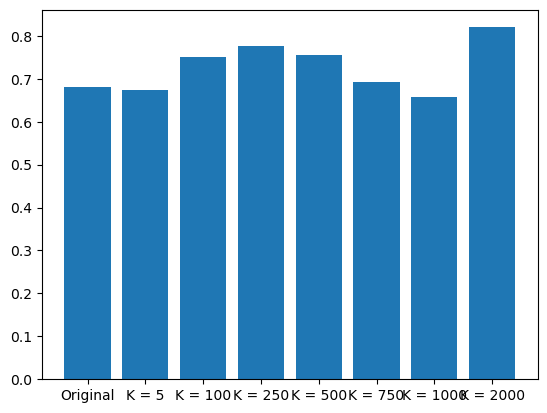

In [21]:
names = ["Original"] + [f"K = {k}" for k in k_list]
plt.bar(names, test_accs, )